In [ ]:
# load responses.json

import json

with open('responses.json') as f:
    data = json.load(f)

print(data)

In [4]:
# group data by participantId

participants = {}

for response in data:
    participantId = response['participantId']
    # if response['score'] is an object ignore it
    if isinstance(response['score'], dict):
        continue
    # ignore data before may 25th using timestamps as a string
    if response['timestamp'] < '2023-05-25':
        continue
    if participantId not in participants:
        participants[participantId] = []
    participants[participantId].append(response)

# filter out participants with at least 5 responses

participants = {k: v for k, v in participants.items() if len(v) == 5}

# make into array

scores = list(participants.values())
scores = [score for participant in scores for score in participant]


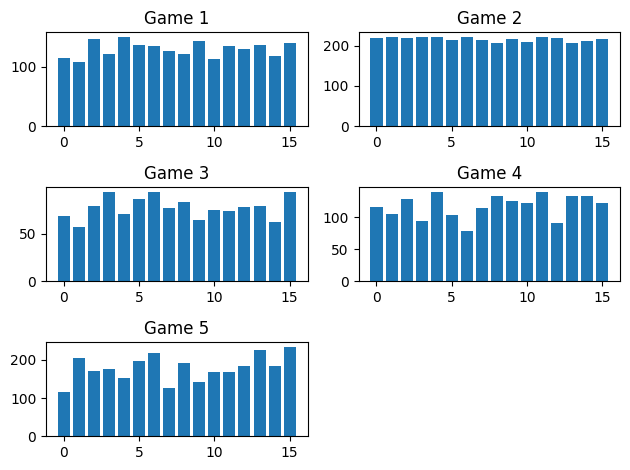

In [5]:
# plot scores

import matplotlib.pyplot as plt

for i in range(5):
  gameScores = [score['score'] for score in scores if score['gameNumber'] == i]

  # subplot
  plt.subplot(3, 2, i+1)
  # bar charts
  plt.bar(range(len(gameScores)), gameScores)
  # title
  plt.title('Game ' + str(i+1))
  # make title fit
  plt.tight_layout()
  

plt.show()


In [6]:
import requests

# get env variable OPENAI_API_KEY
import os
api_key = os.environ.get('OPENAI_API_KEY')

url = "https://api.openai.com/v1/chat/completions"

def chat(messages):
    headers = {
        "Content-Type": "application/json",
        "Authorization": "Bearer " + api_key,
    }

    data = {
        "model": "gpt-3.5-turbo",
        "messages": messages,
        # "max_tokens": 4000,
        "temperature": 0.4
    }

    response = requests.post(url, headers=headers, json=data, verify=False)

    data = response.json()

    return data['choices'][0]['message']

messages = []
messages.append({ "role": "user", "content": "Hello" })

message = chat(messages)
print(message['content'])
messages.append(message)
messages.append({ "role": "user", "content": "What is one plus one?" })

chat(messages)


/Users/rost/Library/Python/3.9/lib/python/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.openai.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Hello! How can I assist you today?


/Users/rost/Library/Python/3.9/lib/python/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.openai.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


{'role': 'assistant', 'content': 'One plus one equals two.'}

In [12]:
maxScores = [149.89499999999998, 225.0, 75.171, 149.89575, 224.94075]

for i in range(5):
    gameScore = [score['score'] for score in scores if score['gameNumber'] == i]
    # avg
    avg = sum(gameScore) / len(gameScore)
    # mean
    mean = sum(gameScore) / len(gameScore)
    # median
    median = sorted(gameScore)[len(gameScore) // 2]
    # std
    std = (sum([((score - mean)/maxScores[i])**2 for score in gameScore]) / len(gameScore))**0.5
    # print(median / maxScores[i])
    # print(mean / maxScores[i], std)
    print(std)


0.08207625203461805
0.02371220189097838
0.14492795472656292
0.11975218666142484
0.14431889428548034


In [24]:
121/150

0.8066666666666666